# Boston Housing Project

## 0. 데이터 불러오기 및 전처리

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
os.listdir()

['.ipynb_checkpoints', 'Boston_LinearRegression.ipynb', 'housing.csv']

### 0.1 데이터 불러오기

In [5]:
df=pd.read_csv('housing.csv')
df

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...
...,...
500,0.06263 0.00 11.930 0 0.5730 6.5930 69...
501,0.04527 0.00 11.930 0 0.5730 6.1200 76...
502,0.06076 0.00 11.930 0 0.5730 6.9760 91...
503,0.10959 0.00 11.930 0 0.5730 6.7940 89...


### 0.2 컬럼이름 지정 & 공백으로 값 구분
- 컬럼이름 지정: names=col_names
- 공백으로 값 구분: delim_whitespace=True

요소 설명
- CRIM - 마을별 1인당 범죄율
- ZN - 25,000평방피트 이상의 부지에 대해 구획된 주거용 토지의 비율.
- INDUS - 마을당 비소매 사업 에이커의 비율.
- CHAS - 찰스 강 더미 변수(1은 강을 경계로 하는 경우, 0은 그렇지 않음)
- NOX - 일산화질소 농도(1천만 분의 1)
- RM - 주거당 평균 객실 수
- AGE - 1940년 이전에 지어진 소유주 점유 유닛의 비율
- DIS - 보스턴 고용 센터 5곳까지의 가중 거리
- RAD - 방사형 고속도로 접근성 지수
- TAX - 10,000 달러당 전액 재산세율
- PTRATIO - 마을별 학생/교사 비율
- B - 1000(Bk - 0.63)^2 (Bk: 마을별 흑인 비율)
- LSTAT - 모집단의 하위계층의 비율(%)
- MEDV - 본인 소유의 주택가격 (단위: 1000달러)

In [6]:
col_names=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']
df=pd.read_csv('housing.csv', names=col_names, delim_whitespace=True)
df

C:\Users\user\AppData\Local\Temp\ipykernel_9876\3485464672.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df=pd.read_csv('housing.csv', names=col_names, delim_whitespace=True)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


### 0.3 결측치 확인 및 제거

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 0.4 데이터 분할(X,y)

- drop('컬럼명', axis=0)
  axis = 0 (행 row 기준)
  axis = 1 (열 col 기준)

In [8]:
X=df.drop('MEDV', axis=1)
y=df['MEDV']
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


In [9]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 1. 문제 정의
## - 집값에 가장 영향을 많이 미치는 것은 어느것?

In [11]:
df_corr=df.corr()
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


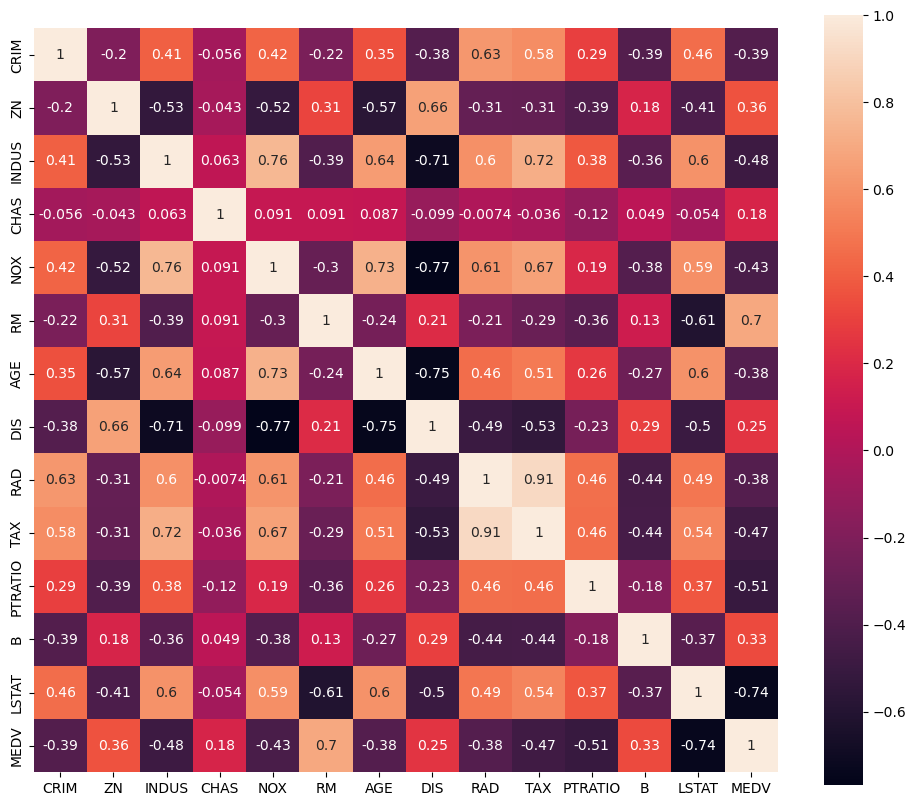

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df_corr,annot=True,square=True)
plt.show()

- LSTAT(모집단의 하위계층의 비율), RM(주거당 평균 객실수)이 상관관계가 있음

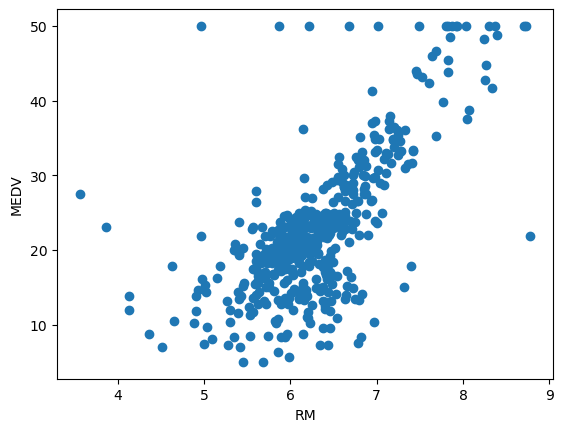

In [14]:
plt.scatter(df['RM'],df['MEDV'])
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

양의 관계로 선형

Text(0, 0.5, 'MEDV')

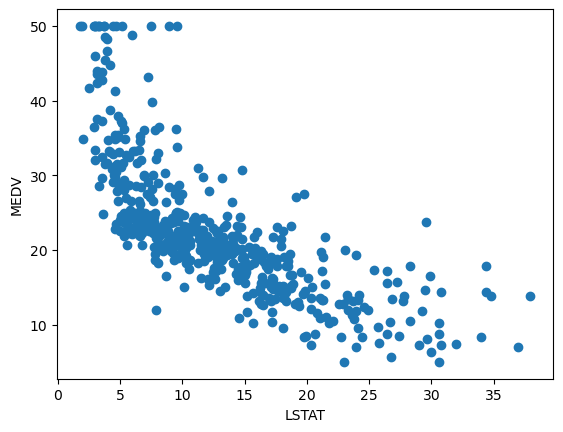

In [15]:
plt.scatter(df['LSTAT'],df['MEDV'])
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

음의 관계로 약간 비선형

## 단변수 선형회귀
-> RM과 MEDV의 관계

In [16]:
from sklearn.linear_model import LinearRegression
X=df[['RM']]
X

,RM
0,6.575
1,6.421
2,7.185
3,6.998
4,7.147
...,...
501,6.593
502,6.120
503,6.976
504,6.794


In [17]:
y=df[['MEDV']]
y

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=34)

In [24]:
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
# 기울기
model.coef_

array([[8.84603322]])

In [26]:
# 절편
model.intercept_

array([-33.01609528])

### MEDV(집값) = 8.84 x RM(방 갯수) - 33.02
- 방 갯수가 하나 늘면 9,100 달러 상승하는 경향

### 선형회귀 예측 성능 지표
#### 1. R2 결정계수
: 모델이 데이터 변동성을 얼마나 잘 설명하는가

In [29]:
y_pred=model.predict(X_test)
y_pred

array([[19.62664841],
       [29.04767379],
       [25.8542558 ],
       [19.89202941],
       [20.95355339],
       [27.76499897],
       [16.45976852],
       [20.90932323],
       [23.93466659],
       [18.94550385],
       [17.5212925 ],
       [27.99499584],
       [22.62545367],
       [19.73280081],
       [34.30221752],
       [17.34437184],
       [24.22658568],
       [25.641951  ],
       [22.09469168],
       [24.94311437],
       [22.94391087],
       [26.97770202],
       [25.07580487],
       [30.27727241],
       [21.06855182],
       [23.38621253],
       [23.3508284 ],
       [21.69662018],
       [24.36812222],
       [23.09429343],
       [ 5.62337782],
       [27.13693061],
       [39.93714068],
       [21.53739159],
       [22.41314887],
       [18.98973402],
       [14.78786824],
       [18.99858005],
       [11.32022322],
       [21.33393282],
       [24.88119214],
       [17.92821003],
       [21.59931382],
       [ 3.58879018],
       [21.33393282],
       [23

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5891357188527192

In [32]:
from sklearn.metrics import mean_squared_error
mse =mean_squared_error(y_test,y_pred)
mse

33.857377713620174